In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


C:\Users\ibiyt\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Boxplots for Total Stats for Pokemon by Primary Type')

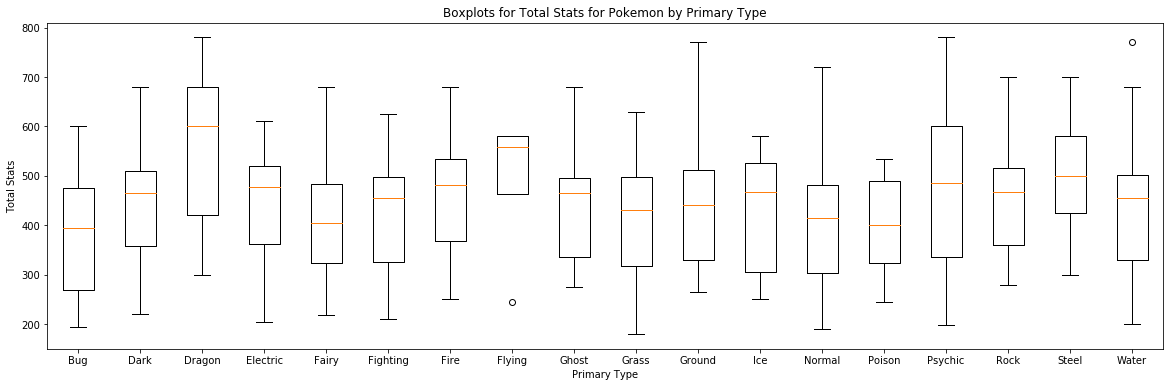

In [70]:
plt.figure(figsize=(20,6)) # initialize the canvas

types = np.unique(data['Type 1'])
distributions = [data['Total'].loc[data['Type 1']==type_] for type_ in types]
plt.boxplot(x=distributions,labels=types)
plt.xlabel('Primary Type')
plt.ylabel('Total Stats')
plt.title('Boxplots for Total Stats for Pokemon by Primary Type')

For this visualization, I wanted to compare the distribution of total stat for the primary type of each Pokemon (this can be found as the Type 1 feature in the dataset.) In terms of encodings I decided not to use, one of them was color. When encoding a boxplot, we have a categorical x axis. This categorical x-axis gives us the ability to identify what each boxplot represents. Color also serves this purpose so it would be redundant to use both color, as an identity channel, and the categorical axis. I also did not encode area in this chart because area would not have adequately shown what we are trying to show: the range of each distribution and its median. In terms of encodings I did use, I wanted to use the position channel on an aligned scale to represent the differences in distributions for each type. With this encoding we can easily see that the median for Bug type is far lower than the median for Dragon type. We also use the length channel to show the range of distributions. For example, we can see that the distribution for Psychic types has a larger range than Rock type, even though they have similar medians. These are two of the easiest channels for individuals to understand as per the slides and notebook. They do not have many drawbacks; however, this plot is not as memorable as a plot that has more chart junk in it.

Text(0.5,1.08,'Total Stats by Primary Type')

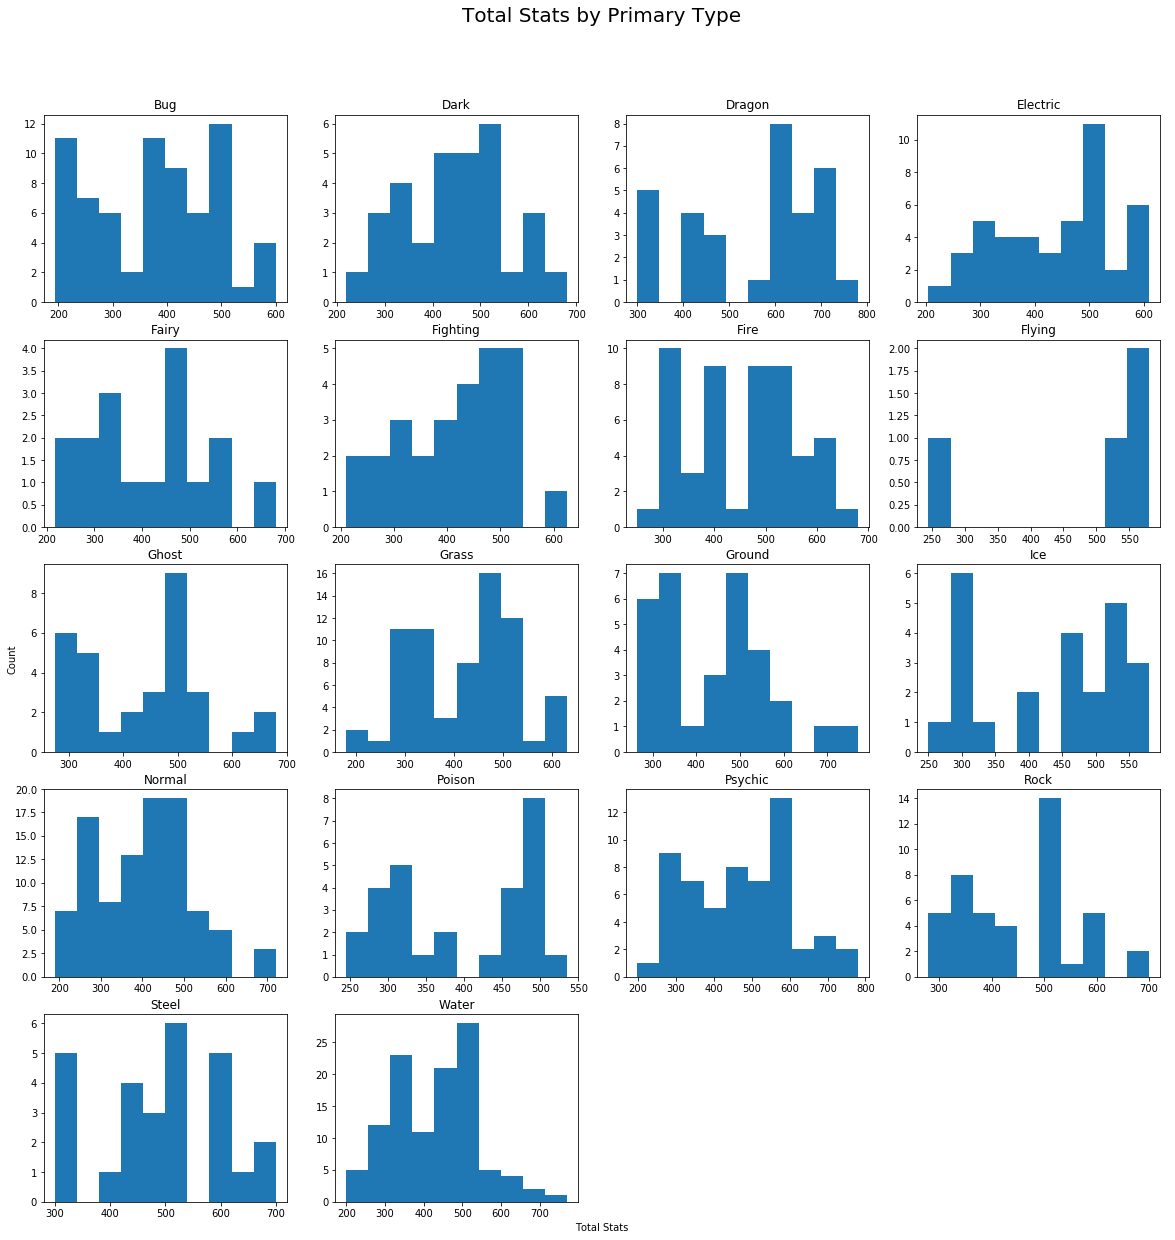

In [75]:
# plot the distribution of total stats by type 1

fig = plt.figure(figsize=(20,20)) # initialize the canvas
ax = fig.add_subplot(111) # big subplot for common axis

# Turn off axis lines and ticks of the big subplot from StackOverflow
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

pltDictionary = {types[i]:fig.add_subplot(5,4,i+1) for i in range(len(types))} # use a dictionary to save the subplots dynamically without manually writing ax'n' where n is the subplot number.

for type_ in pltDictionary: # the key for the dictionary is the primary type which makes it easy to graph the distributions for each type
    pltDictionary[type_].hist(data['Total'].loc[data['Type 1']==type_])
    pltDictionary[type_].set_title(type_) # set title to identify the type that each distribution references. Allows us to not have to use the color identity channel

# common axes
ax.set_xlabel('Total Stats')
ax.set_ylabel('Count')
ax.set_title('Total Stats by Primary Type', y=1.08,fontsize=20)


In a similar vein, I decided to encode total stats by primary type using a small multiples graph. In this chart each subplot references a primary type and the plot is a histogram of the total stats. I did not use the volume channel for this as we are encoding two dimensions (stat and count). I also did not use the color channel for a similar reason as the plot above. Each subplot is labeled with its type, so adding the color channel would be redundant. The primary encoding I use here is length. For each distribution you can see which bin has the most and least amount of Pokemon. For example, Psychic Type has the most Pokemon in the bin that is right around 600. We can also use length to understand distribution shape. For example, Fire type is trimodal as the length channel for three bins is much higher than the other bins.

While it comes down to the question that you are trying to answer, I think the boxplot chart is a far better visualization for answering inter-type distribution analysis. The boxplot uses length and position on a common scale to compare all types. We can easily see the distribution median using the position channel, which is not possible in the small multiples plot. If we wanted to use the second chart for inter-type distribution analsis, we would need to account for the axes as all types have different x and y axes.